In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
X_training = pd.read_csv("train.csv")

In [6]:

X_data = np.array(X_training).T
X_train = X_data[1:785]
X_train.shape



X_train_1 = X_train[:, 0:1000]
X_train_1.shape




X_train_1.shape



(784, 1000)

In [7]:
test = X_train[:, 1].reshape(784,1)
test.shape

(784, 1)

In [8]:
#X_train = (X_train.astype('float32') / 255.0 * 0.99) + 0.01


In [9]:
Y_train = X_data[0]
Y_targs = np.eye(10)[Y_train]

Y_targs = Y_targs.T
Y_targs.shape


Y_targs_1 = Y_targs[:, 0:1000]
Y_targs_1.shape


(10, 1000)

In [10]:
class MLP():
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        
        self.input_weights = np.random.randn(self.hidden_nodes, self.input_nodes) / np.sqrt(self.input_nodes)
        #self.input_weights = np.random.uniform(-0.02, 0.02, (self.hidden_nodes, self.input_nodes)) / np.sqrt(self.input_nodes)
        self.hidden_weights = np.random.rand(self.output_nodes, self.hidden_nodes) / np.sqrt(self.hidden_nodes)
        #self.hidden_weights = np.random.uniform(-0.02, 0.02, (self.output_nodes, self.hidden_nodes)) / np.sqrt(self.hidden_nodes)
        #self.hidden_bias = np.random.rand(self.output_nodes, 1) - 0.5
        #self.input_bias = np.random.rand(self.hidden_nodes, 1) - 0.5
        self.hidden_bias = np.zeros((self.output_nodes, 1))
        self.input_bias = np.zeros((self.hidden_nodes, 1))
         
        
    def feed_forward(self,X):
        
        self.Z1 = np.dot(self.input_weights, X) + self.input_bias
        #self.A1 = self.sigmoid(self.Z1)
        self.A1 = self.LReLU(self.Z1)
        self.Z2 = np.dot(self.hidden_weights, self.A1) + self.hidden_bias
        out = self.softmax(self.Z2)
        
        return out
        
        
        
    def sigmoid(self, x):
        return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))
    
    def softmax(self,Z):
        A = np.exp(Z) / sum(np.exp(Z))
        return A
    
    def LReLU(self, x):
        return np.maximum(0.01*x, x)
        
        
    def DerivReLU(self, x):
        return np.where(x <= 0, 0.01, 1)

    def cross_entropy(self, y_true, y_pred):
        m = y_true.shape[1]
        log_likelihood = -np.sum(np.log(y_pred) * y_true) / m
        return log_likelihood
        
        
    def backprop(self, inputs_list, targets_list):
        
        m = targets_list.size
        outs = self.feed_forward(inputs_list)
        output_error = outs - targets_list
        print(self.cross_entropy(targets_list, outs))
        soft_error = outs * (1-outs)
        dz2 = output_error * soft_error
        dw2 = 1/m * np.dot(dz2, self.A1.T)
        db2 = 1/m * dz2
        da1 = np.dot(self.hidden_weights.T, dz2)
        #dz1 = da1 * self.A1 * (1-self.A1)
        dz1 = da1 * self.DerivReLU(self.Z1)
        dw1 = 1/m * np.dot(dz1, inputs_list.T)
        db1 = 1/m * dz1
        
        
        
        return dw1, dw2, db1, db2
    
    
    def get_predictions(self, X2):
        return np.argmax(X2, 0)
    
    
    def train(self, inputs_list, targets_list, epochs=100, lr=0.001):
        
        for i in range(epochs):
            #print("Iteration: " + str(i))
            
            input_weights, hidden_weights, input_bias, hidden_bias  = self.backprop(inputs_list, targets_list)
            self.input_weights = self.input_weights - (lr*input_weights)
            self.hidden_weights = self.hidden_weights - (lr*hidden_weights)
            self.input_bias = self.input_bias - (lr*input_bias)
            self.hidden_bias = self.hidden_bias - (lr*hidden_bias)
            
        outputs = self.feed_forward(inputs_list)
            
        return self.get_predictions(outputs)
        
        
        
        
        
        
        

        
    
        
        
    



In [11]:
c = MLP(784, 100, 10)
Y_targs_1.shape

(10, 1000)

In [12]:
b = c.train(X_train_1, Y_targs_1, 500, 0.2)

23.815616097726807
12.647983110209408
5.683223696643483
3.4029121438639502
2.80680854438864
2.531319776406924
2.369208461593039
2.248907914429294
2.1502958846383664
2.062893755683079
1.9845782571007813
1.9091696271773935
1.8439911667297952
1.7864255017567112
1.731543556873096
1.6763188011601167
1.6221158177936041
1.5701540787259174
1.5209375325207666
1.477389923446186
1.435192030068493
1.3921199111255012
1.3445004432630134
1.296296213547257
1.2530050479963315
1.2176887067829887
1.186518758492891
1.157704957583695
1.1319566844233655
1.107582018924081
1.0853451882615026
1.063360680637
1.0420983302951434
1.0218674767716205
1.0022701088503614
0.9832738261124419
0.9650898430422412
0.9470279395852558
0.9296601021460424
0.9127464540488421
0.8962230372454713
0.8804082708395333
0.8653367904763652
0.8505671001274402
0.8363486264664426
0.8224563399900742
0.8094475629228808
0.7964187211168173
0.784369568542334
0.7722421212564066
0.7606610044908759
0.7484115657735483
0.7368927543142029
0.7250742756

0.11770745960045932
0.11823786742446007
0.11767486361075882
0.11808154465245366
0.11723031110292989
0.11742849705840389
0.11745108305325991
0.11770927128606248
0.11710374902469209
0.11705686974398989
0.1167604395541451
0.11695198453497978
0.1162714069184402
0.11717757315595181
0.115805765516095
0.11679302611684853
0.11621757146939657
0.116193217895051
0.11606371575006559
0.11635822224371242
0.11600637332055587
0.11598342994570764
0.11585792964984755
0.1159881584497042
0.11539685876718325
0.1156695342764039
0.11549520945606695
0.11534745826678174
0.1155848223940545
0.11504042590394026
0.11566358244603206
0.11509907852286241
0.11532978494968624
0.11513999807814401
0.11516350466947367
0.11460429178211237
0.11514380349699865
0.11424950127391943
0.1146689613838043
0.11469263394925108
0.11429082646615865
0.11489343766721981
0.11369583474409212
0.1145225009635807
0.11384578871169021
0.11379691487506674
0.11400840483658774
0.11352122319297231
0.11404567372841504
0.11289193895544415
0.113369443

In [13]:
b

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6,
       2, 0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 4,
       2, 6, 3, 7, 7, 4, 7, 5, 1, 9, 0, 2, 2, 3, 9, 1, 1, 1, 5, 0, 6, 3,
       4, 8, 1, 0, 3, 9, 6, 2, 6, 4, 7, 1, 4, 1, 5, 4, 8, 9, 2, 9, 9, 8,
       9, 6, 3, 6, 4, 6, 2, 9, 1, 2, 0, 5, 9, 2, 7, 7, 4, 8, 8, 5, 0, 6,
       0, 0, 2, 9, 0, 4, 7, 7, 1, 5, 7, 9, 4, 6, 1, 5, 7, 6, 5, 0, 4, 8,
       4, 6, 1, 8, 7, 3, 7, 3, 1, 0, 3, 4, 5, 4, 0, 5, 4, 0, 3, 5, 1, 0,
       8, 3, 7, 0, 9, 6, 6, 9, 5, 4, 6, 9, 3, 5, 4, 2, 4, 8, 7, 4, 5, 8,
       8, 8, 2, 6, 9, 3, 1, 0, 4, 1, 5, 9, 0, 6, 2, 1, 3, 0, 6, 0, 0, 8,
       3, 2, 0, 0, 6, 0, 0, 4, 7, 2, 7, 1, 9, 9, 3, 9, 8, 4, 6, 6, 5, 3,
       8, 1, 8, 7, 1, 3, 7, 6, 3, 6, 3, 6, 3, 2, 3, 2, 2, 7, 9, 2, 3, 2,
       7, 5, 5, 8, 8, 2, 0, 1, 4, 0, 6, 3, 7, 1, 1, 1, 4, 7, 0, 2, 9, 2,
       0, 5, 6, 0, 8, 9, 6, 2, 0, 0, 7, 2, 0, 4, 2, 0, 9, 1, 6, 9, 3, 0,
       0, 2, 0, 6, 8, 4, 0, 7, 2, 1, 9, 5, 2, 4, 8,

In [14]:
np.sum(b == Y_train[:1000])*100 / 1000

99.1

In [15]:
Y_targs_1.shape

(10, 1000)

In [16]:
b.shape

(1000,)

In [17]:
Y_targs = np.eye(10)[Y_train]
Y_targs.shape

Y_train[:1000].shape

(1000,)

In [18]:
Y_targs_1[:, 0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
Y_train[0]

1

In [32]:
current_image = X_train_1[:, 100]

In [33]:
current_image = current_image.reshape((28, 28))

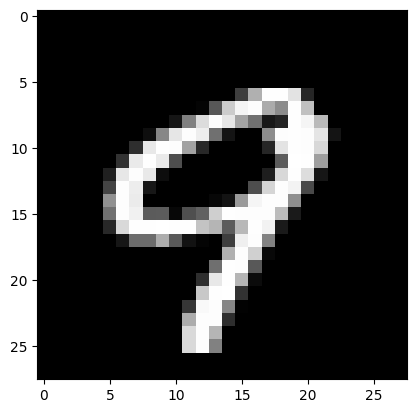

In [34]:
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

In [35]:
b[100]

9